In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <i>CSV IMPORT</i>

In [57]:
df_list = []

for i in range(19, 31):
    file_path = f"../../datasets/eda_dataset/urls_{i}.csv"
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
        print(f"Loaded: urls_{i}.csv")
    except FileNotFoundError:
        print(f"File not found: urls_{i}.csv")

file_31 = "../../datasets/eda_dataset/urls_31.csv"
try:
    df_31_nonmal = pd.read_csv(file_31, nrows=33558)  
    df_list.append(df_31_nonmal)
    print("Loaded: urls_31.csv (non-malicious part)")
except FileNotFoundError:
    print("File not found: urls_31.csv")

cf1 = pd.concat(df_list, ignore_index=True)
print(f"\nCombined DataFrame 1 shape: {cf1.shape}")

Loaded: urls_19.csv
Loaded: urls_20.csv
Loaded: urls_21.csv
Loaded: urls_22.csv
Loaded: urls_23.csv
Loaded: urls_24.csv
Loaded: urls_25.csv
Loaded: urls_26.csv
Loaded: urls_27.csv
Loaded: urls_28.csv
Loaded: urls_29.csv
Loaded: urls_30.csv
Loaded: urls_31.csv (non-malicious part)

Combined DataFrame 1 shape: (1233558, 40)


In [8]:
df_list = []

try:
    df_31_mal = pd.read_csv(file_31, skiprows=range(1, 33558+1)) 
    df_list.append(df_31_mal)
    print("Loaded: urls_31.csv (malicious part)")
except FileNotFoundError:
    print("File not found: urls_31.csv")

for i in range(32, 37):
    file_path = f"../../datasets/eda_dataset/urls_{i}.csv"
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
        print(f"Loaded: urls_{i}.csv")
    except FileNotFoundError:
        print(f"File not found: urls_{i}.csv")

cf2 = pd.concat(df_list, ignore_index=True)
print(f"\nCombined DataFrame 2 shape: {cf2.shape}")

Loaded: urls_31.csv (malicious part)
Loaded: urls_32.csv
Loaded: urls_33.csv
Loaded: urls_34.csv
Loaded: urls_35.csv
Loaded: urls_36.csv

Combined DataFrame 2 shape: (566442, 40)


In [9]:
cf1.columns

Index(['url', 'label', 'dots', 'at', 'equals', 'slashes', 'hyphens', 'colons',
       'question_marks', 'digits', 'and', 'underscore', 'tilde', 'percent',
       'lowercase', 'uppercase', 'upper_to_lower_ratio', 'is_https',
       'url_length', 'domain_length', 'path_length', 'path_depth',
       'query_length', 'query_count', 'fragment_length', 'se_url', 'se_domain',
       'se_path', 'se_query', 'se_fragment', 'cte_domain', 'is_domain_ip',
       'tld', 'is_tld_iana_reg', 'is_mtld', 'subdomains', 'special_chars',
       'digit_to_length_ratio', 'char_to_length_ratio',
       'specialchar_to_length_ratio'],
      dtype='object')

# <i>VISUALISATION</i>

In [10]:
def line_plot(column_name):
    fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

    axes[0].plot(cf1.sort_values(column_name)[column_name].reset_index(drop=True))
    axes[0].set_title("Non-Malicious")
    axes[0].set_xlabel("Index")
    axes[0].set_ylabel(f"{column_name} Count")
    axes[0].set_ylim(0, 100)
    
    axes[1].plot(cf2.sort_values(column_name)[column_name].reset_index(drop=True))
    axes[1].set_title("Malicious")
    axes[1].set_xlabel("Index")
    
    plt.tight_layout()
    plt.suptitle(f"{column_name.upper()}", fontsize=16, y=1.05)
    plt.show()

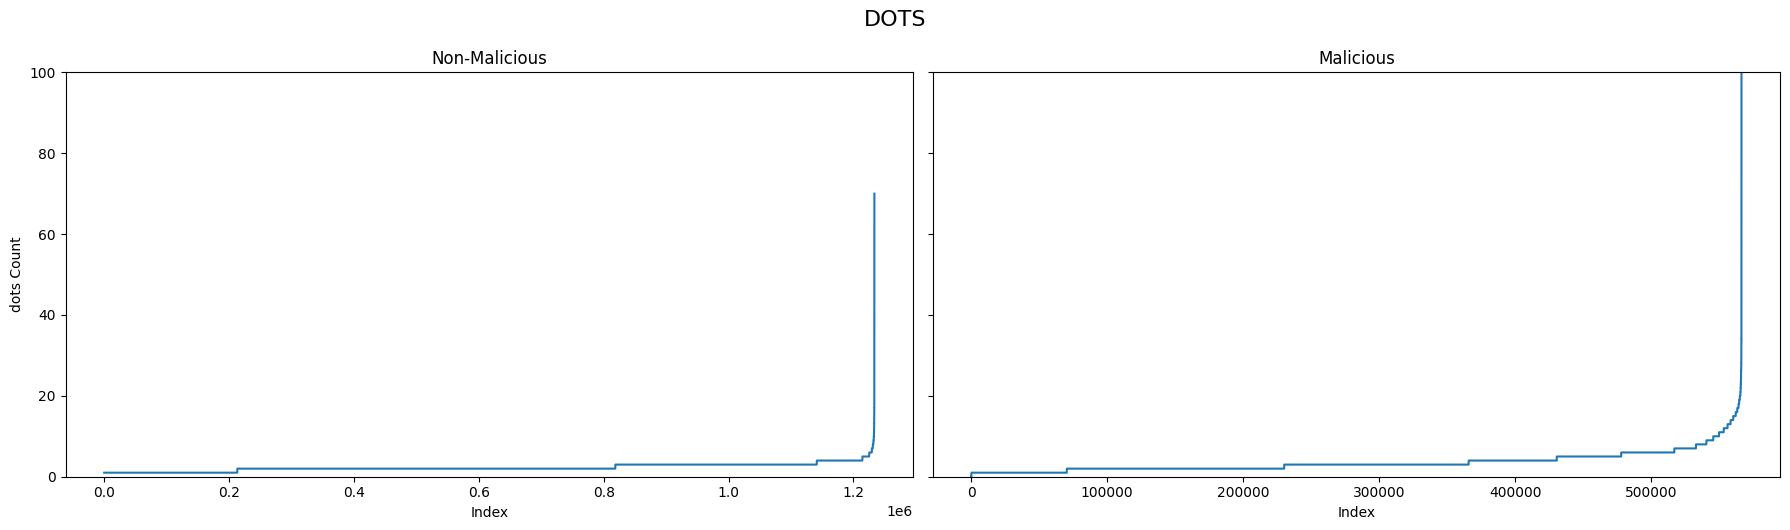

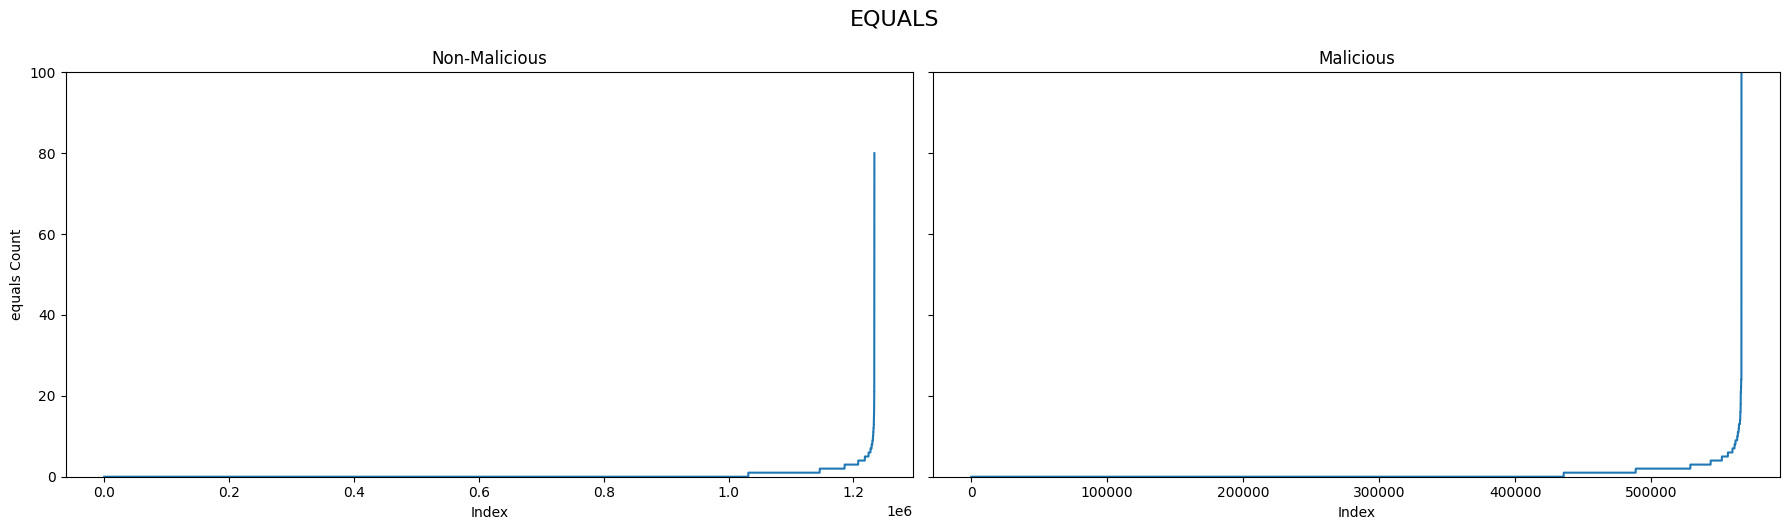

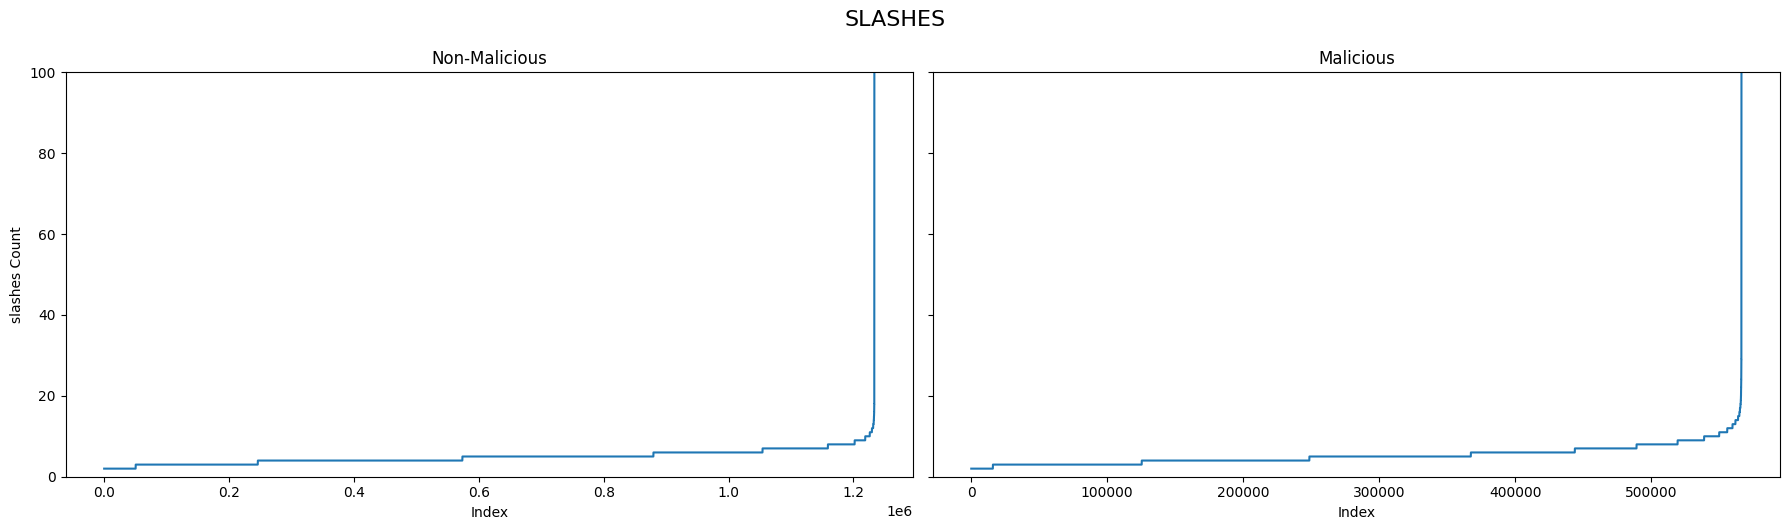

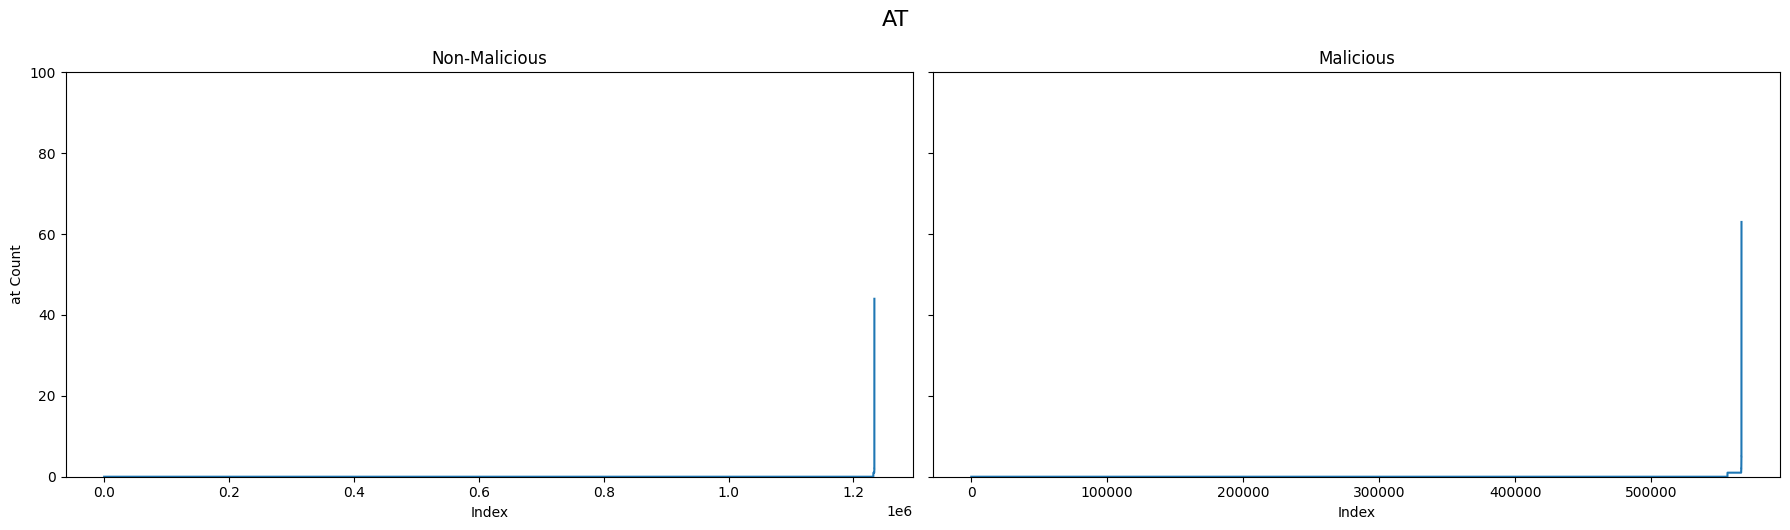

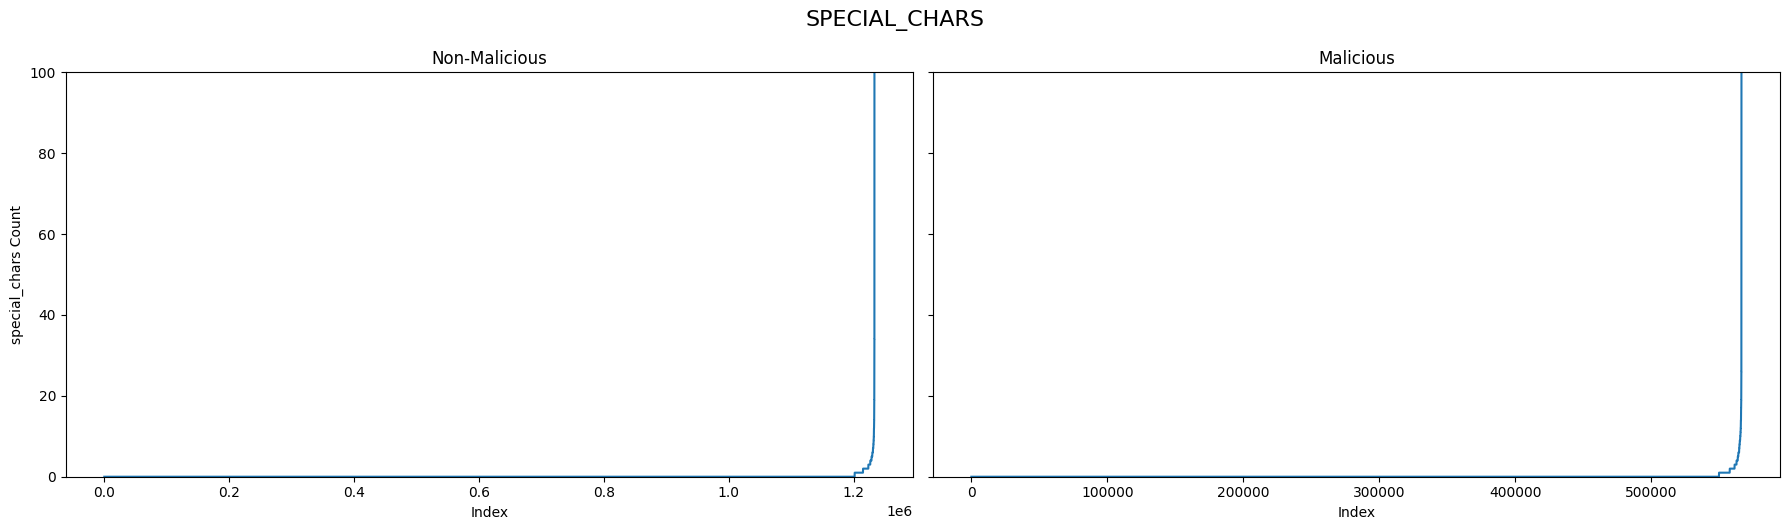

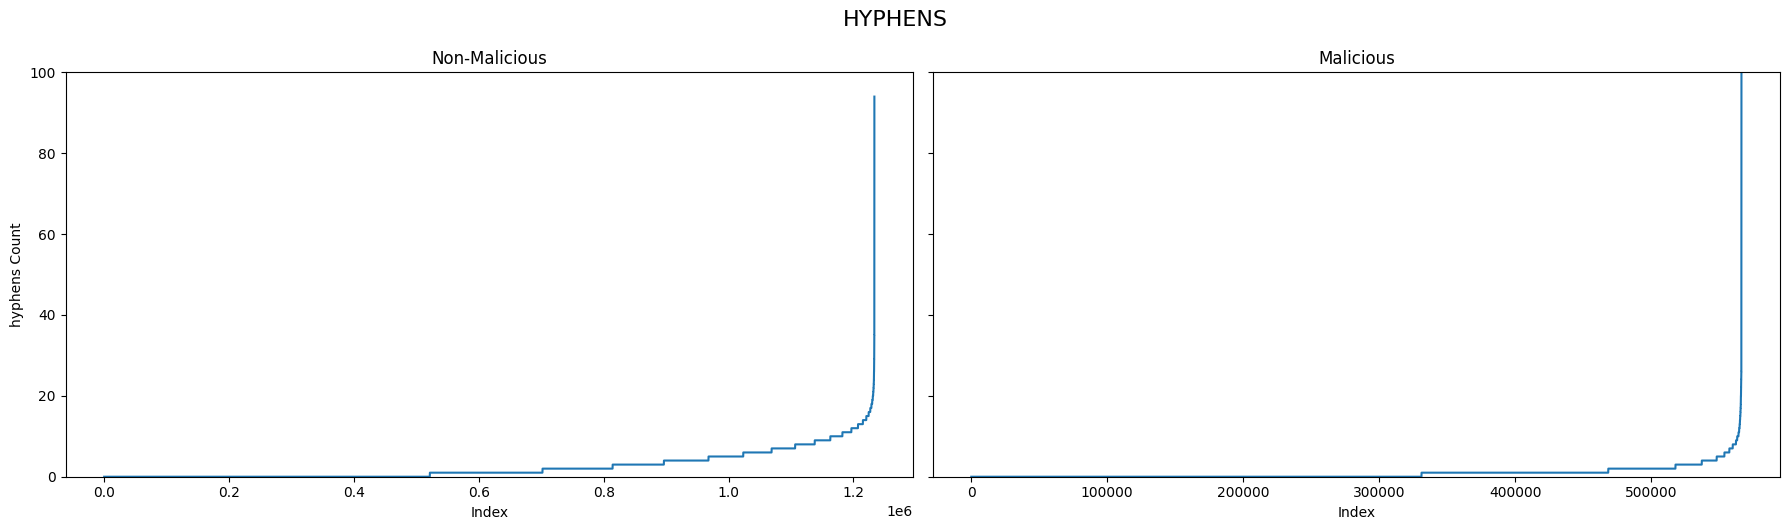

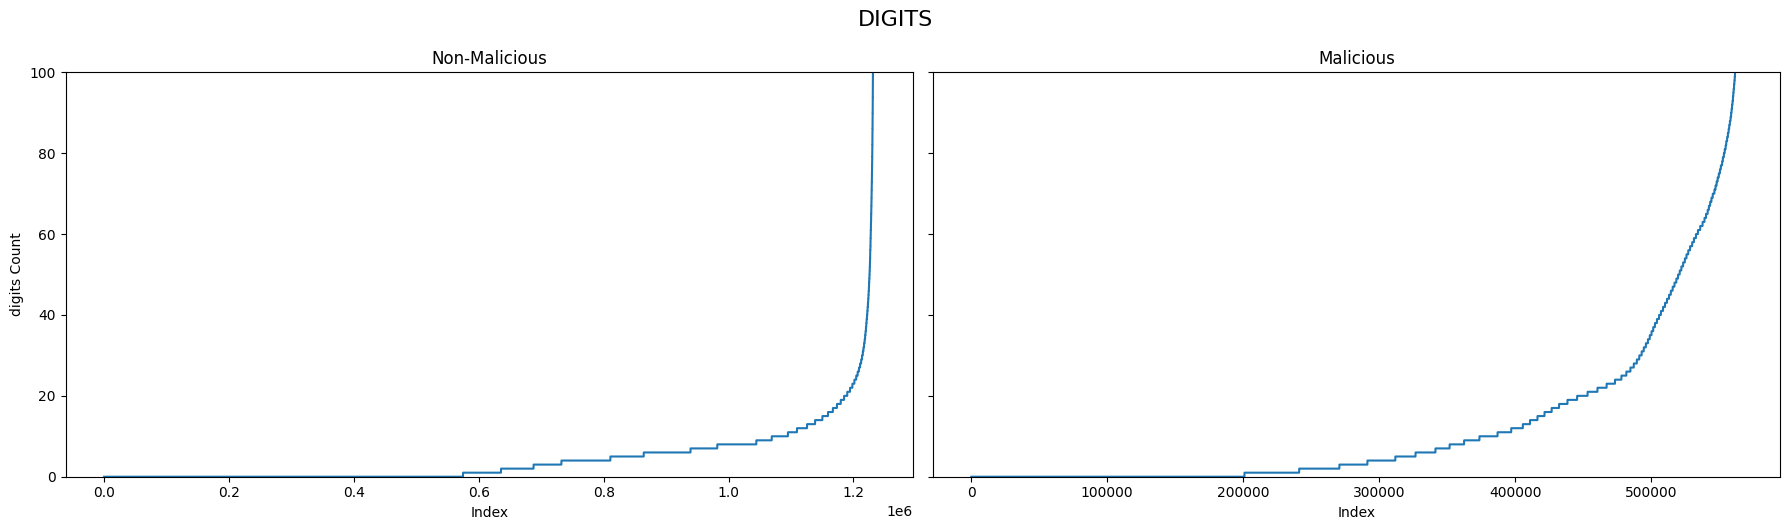

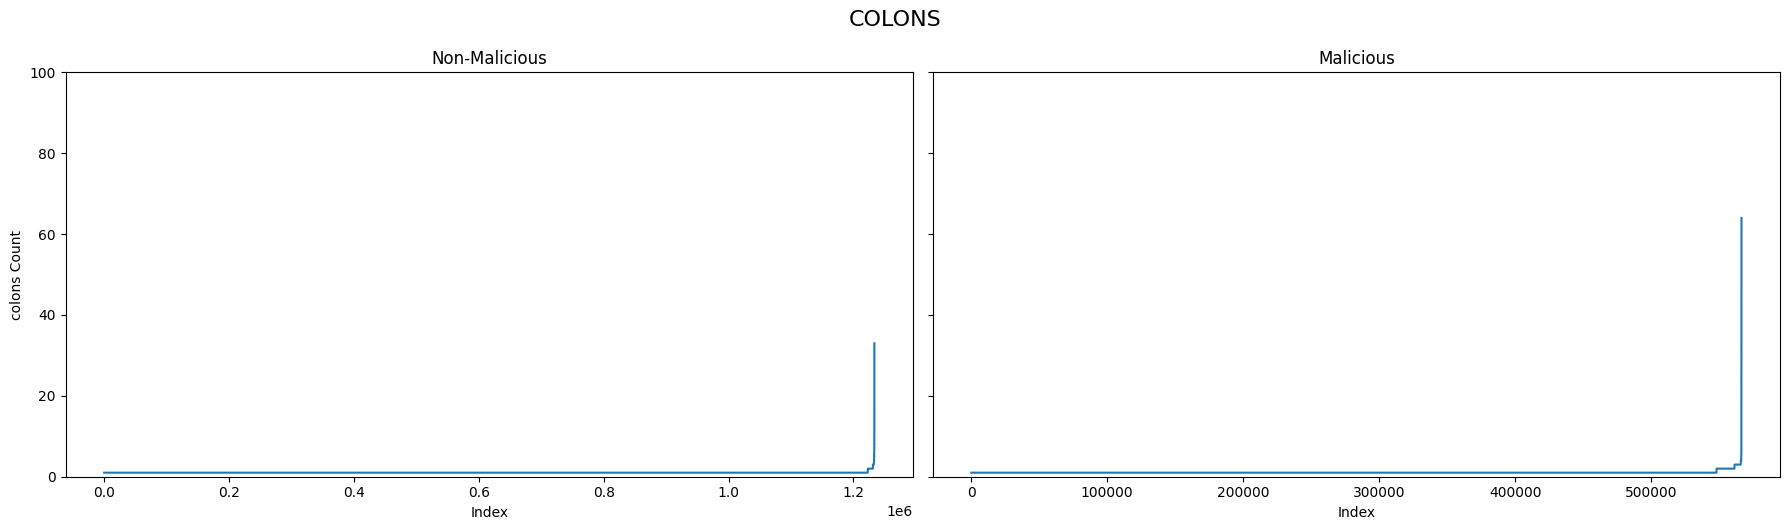

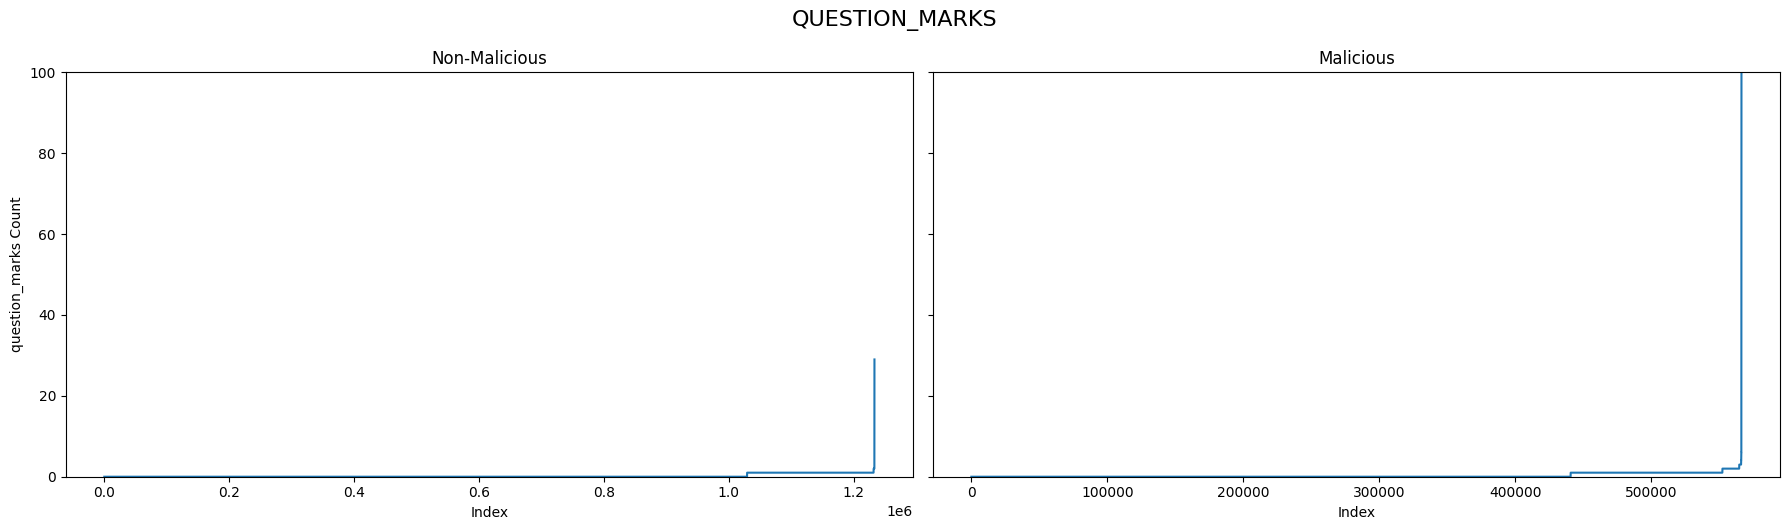

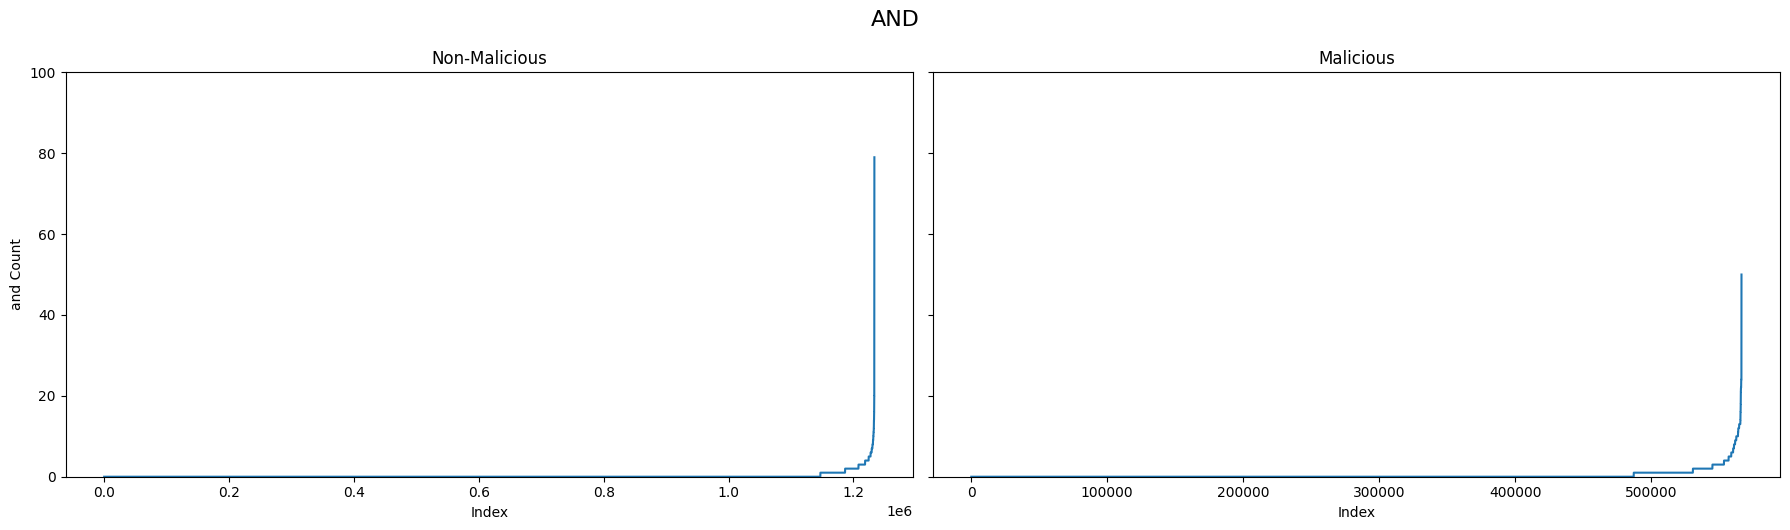

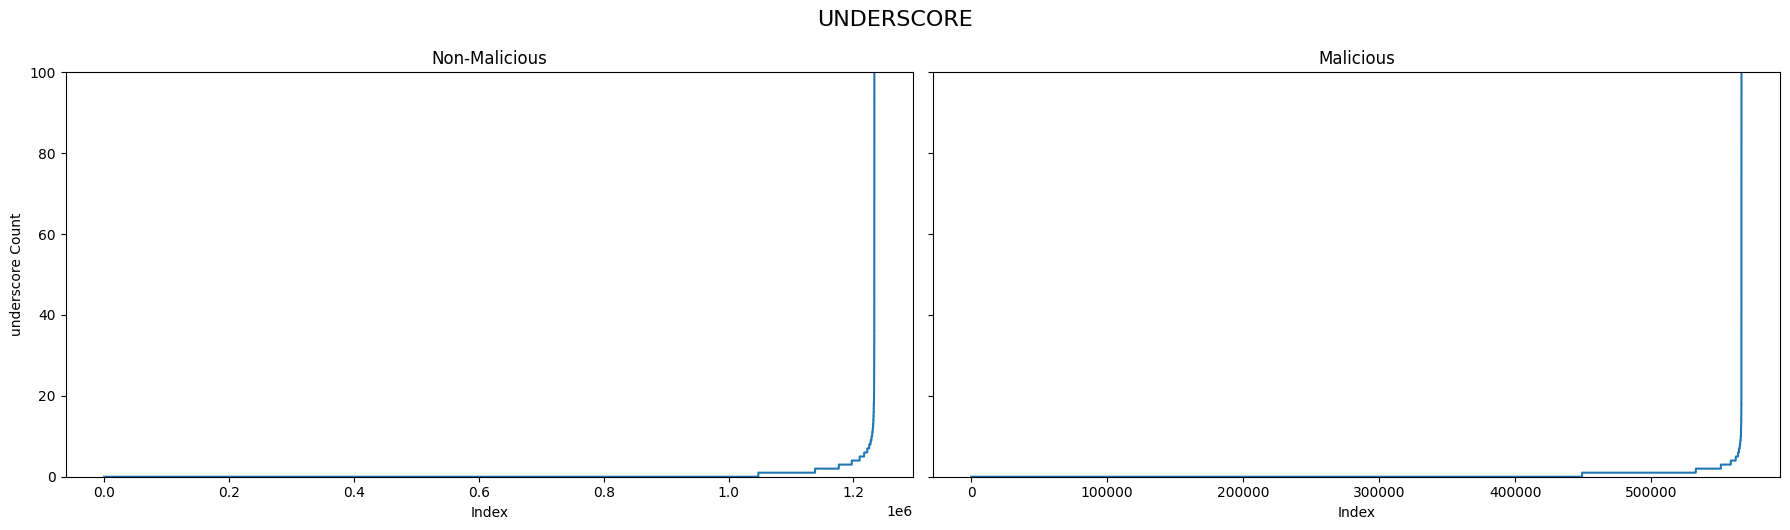

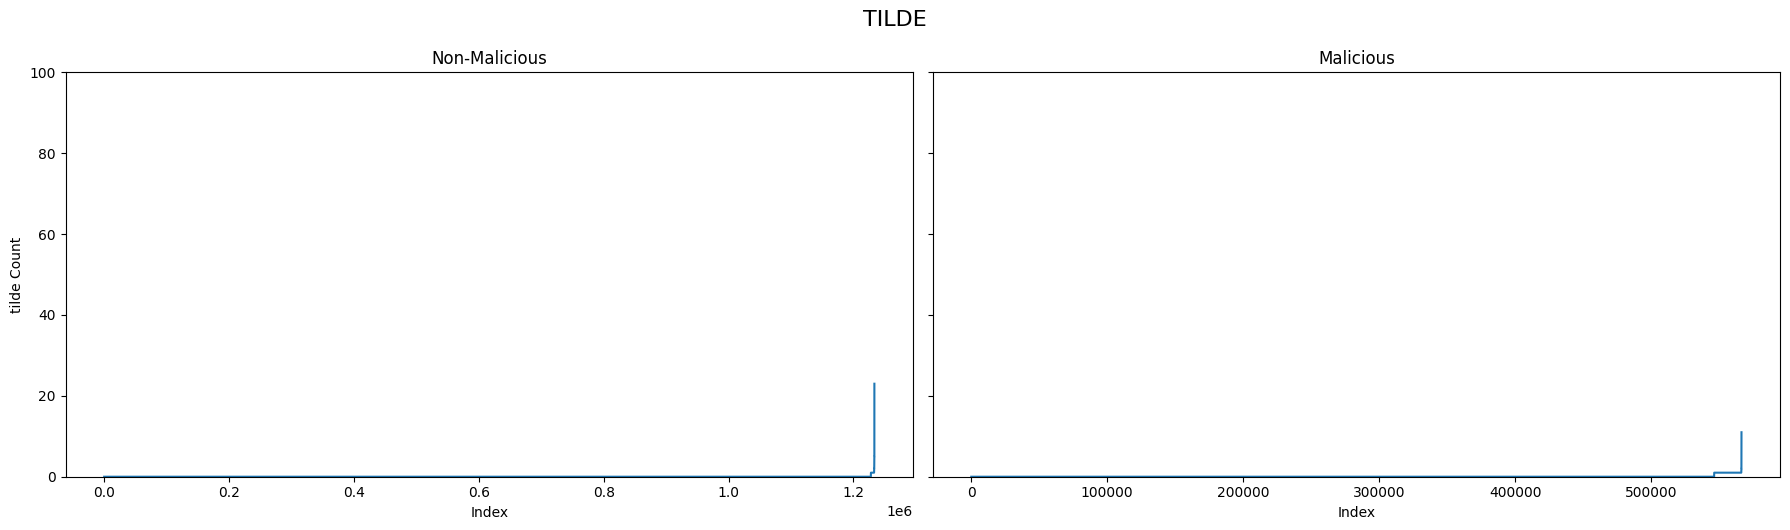

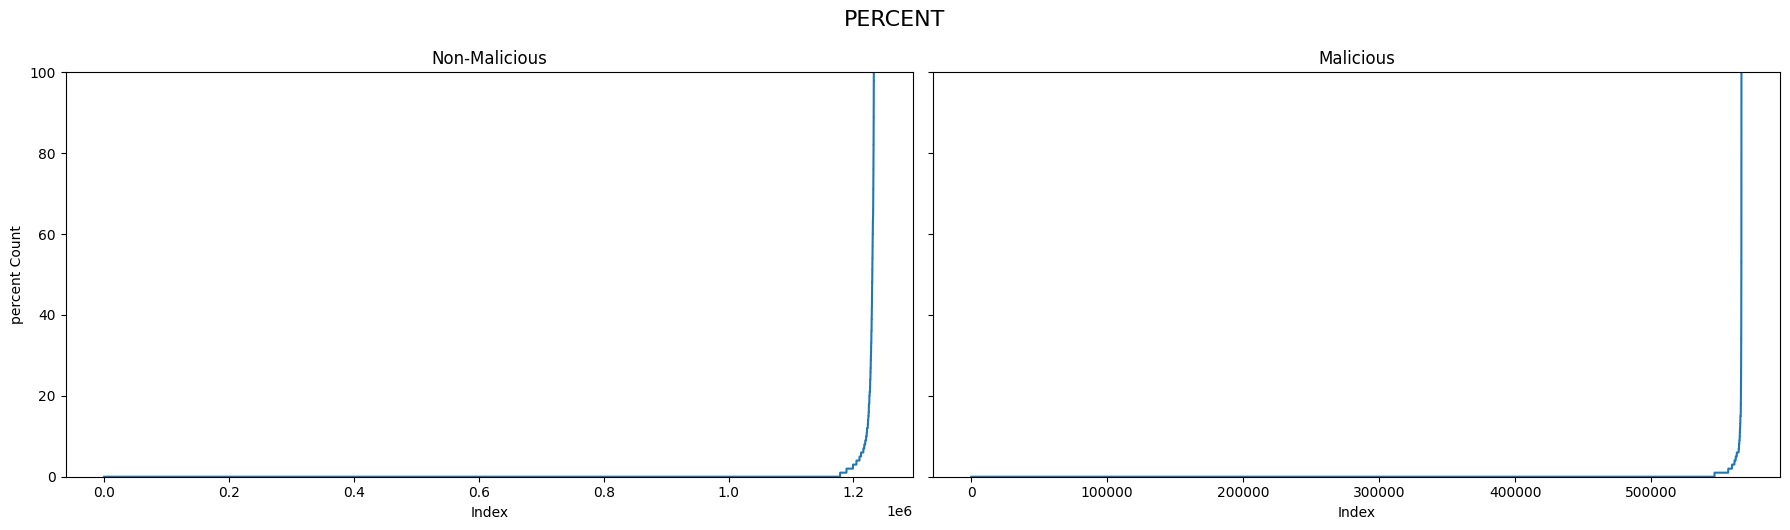

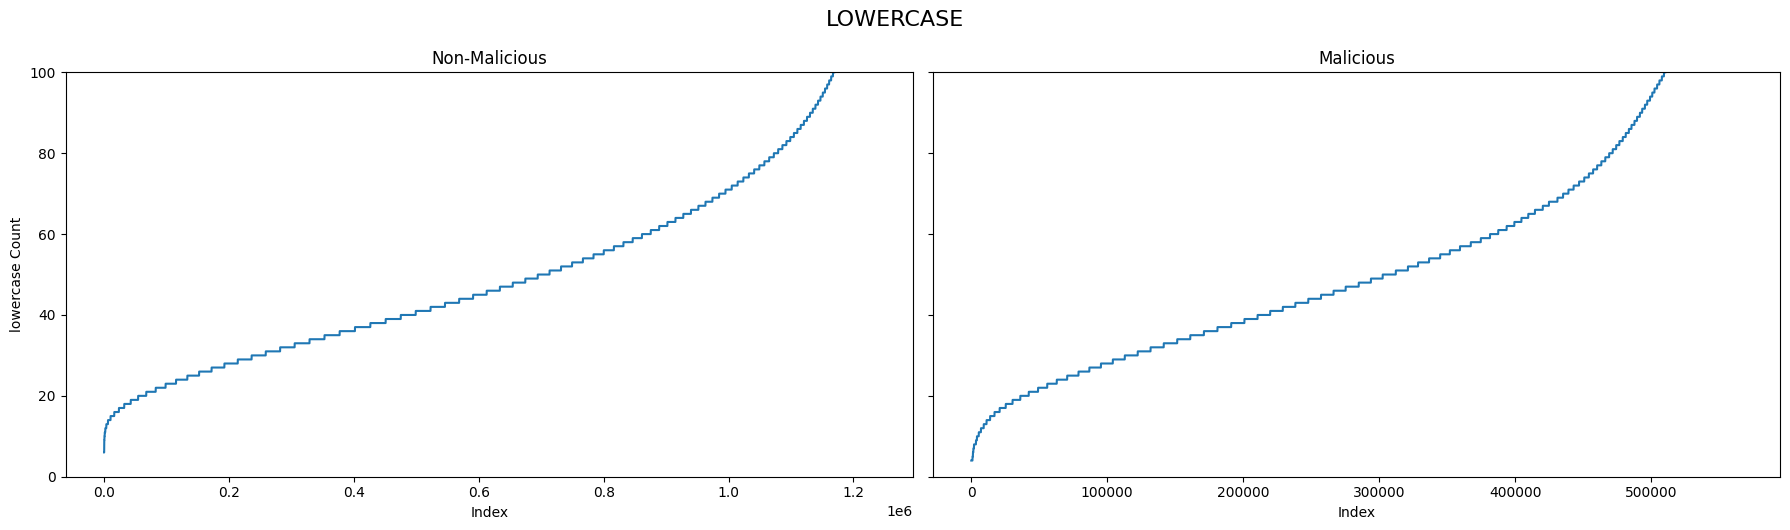

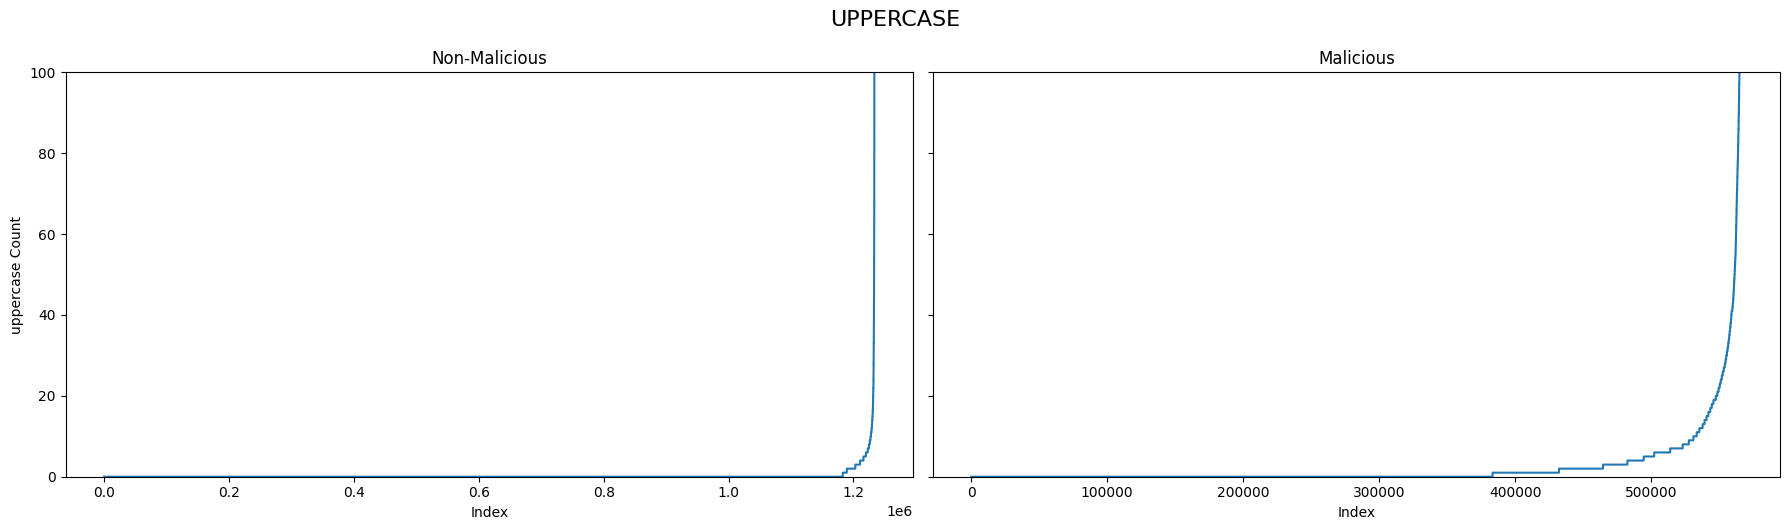

In [11]:
column_list = ["dots", "equals", "slashes", "at", "special_chars", "hyphens", "digits", "colons", "question_marks", "and", "underscore", "tilde", "percent", "lowercase", "uppercase"]

for i in column_list:
    line_plot(i)

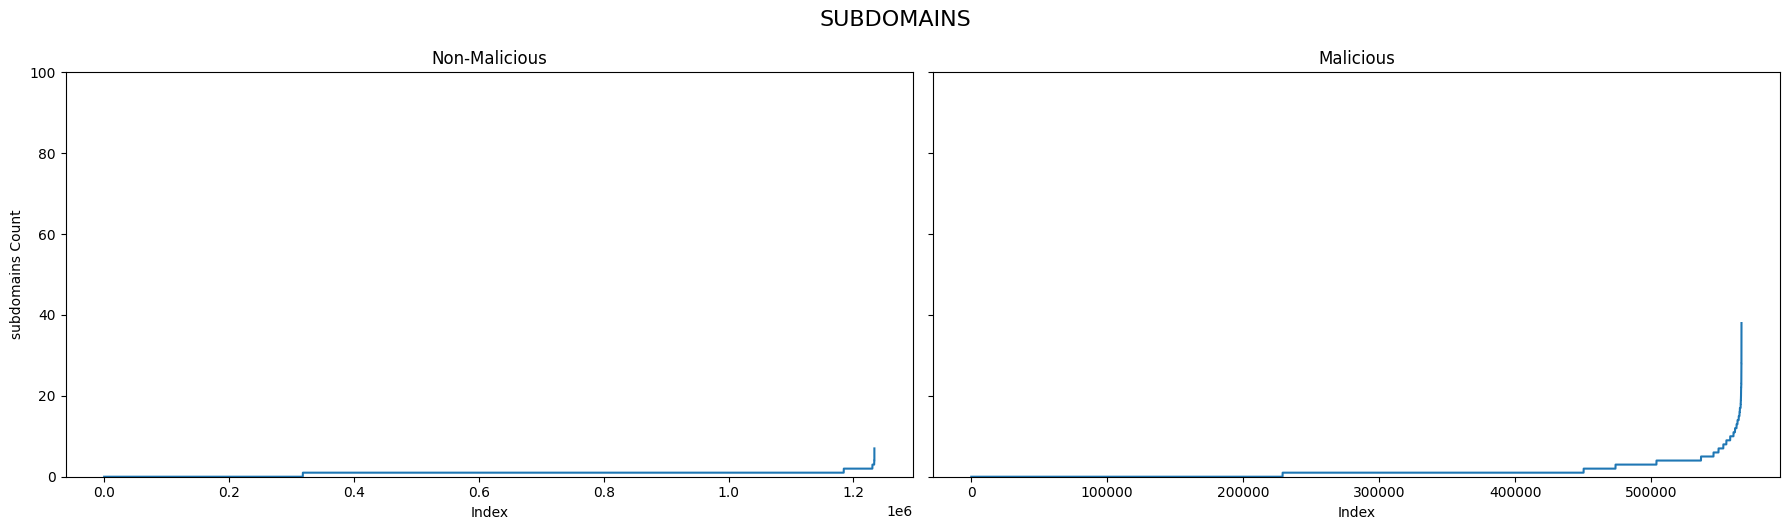

In [12]:
line_plot("subdomains")

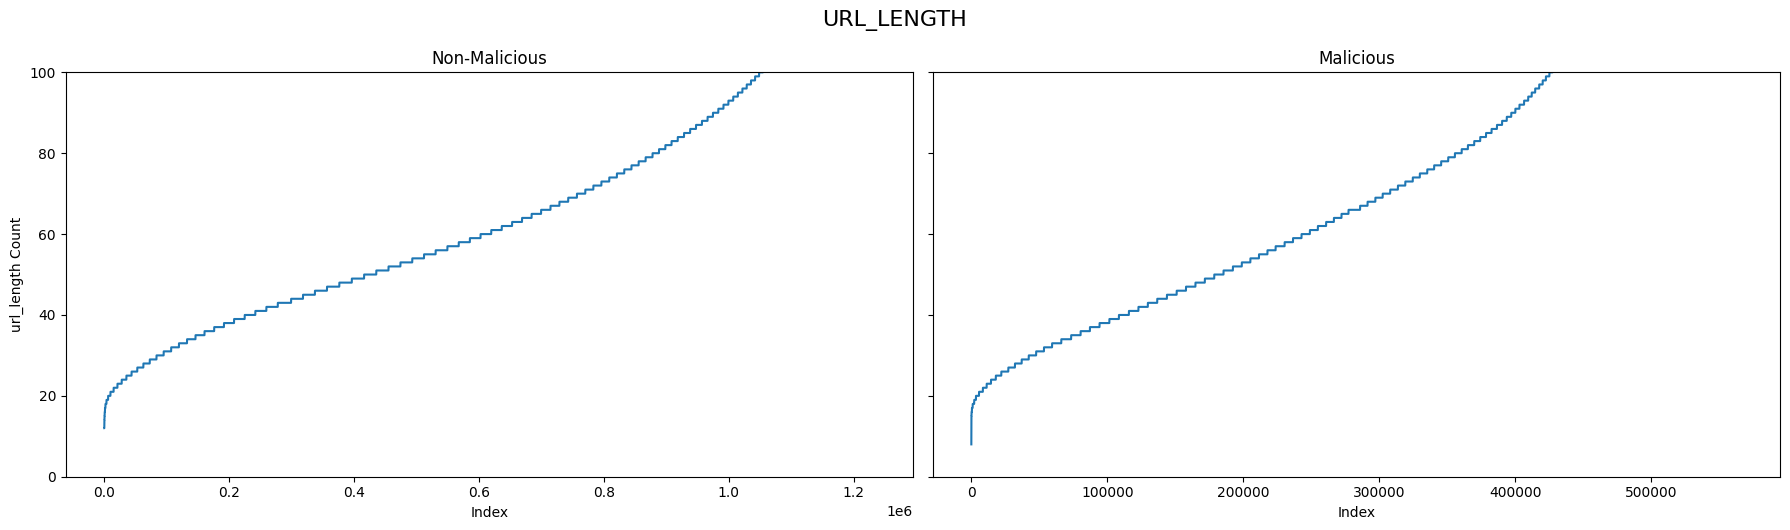

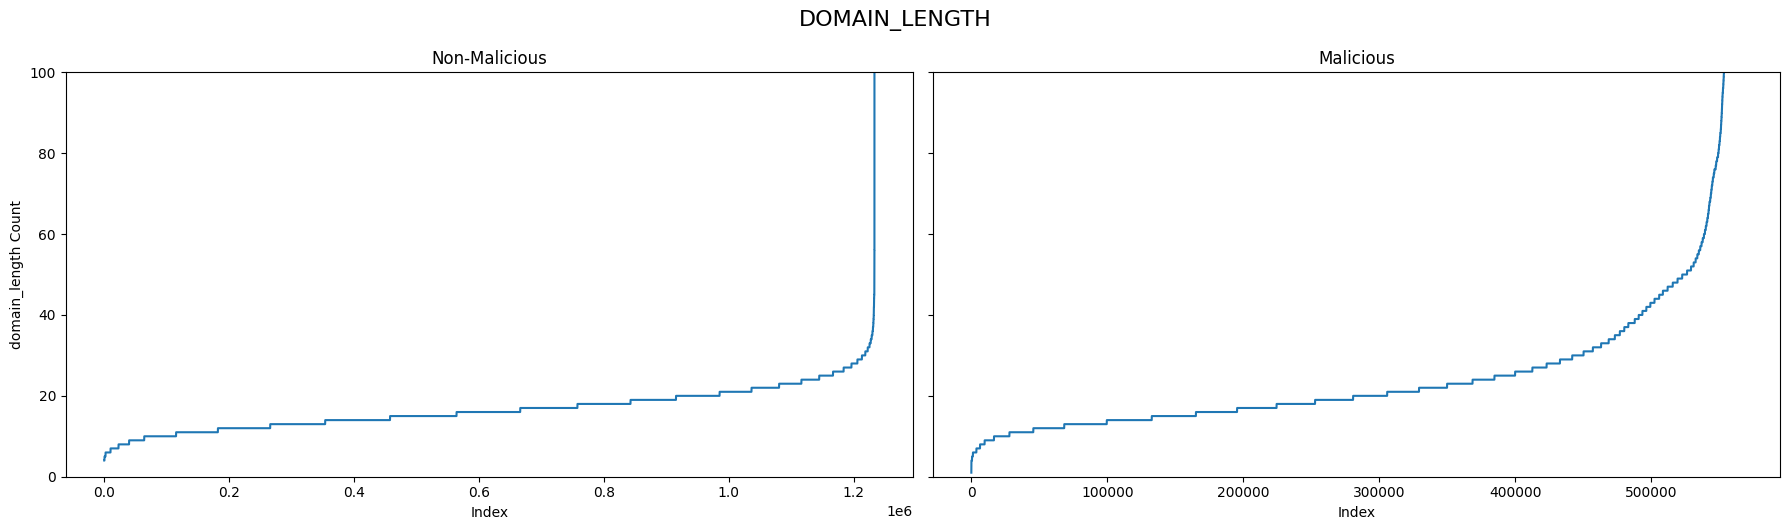

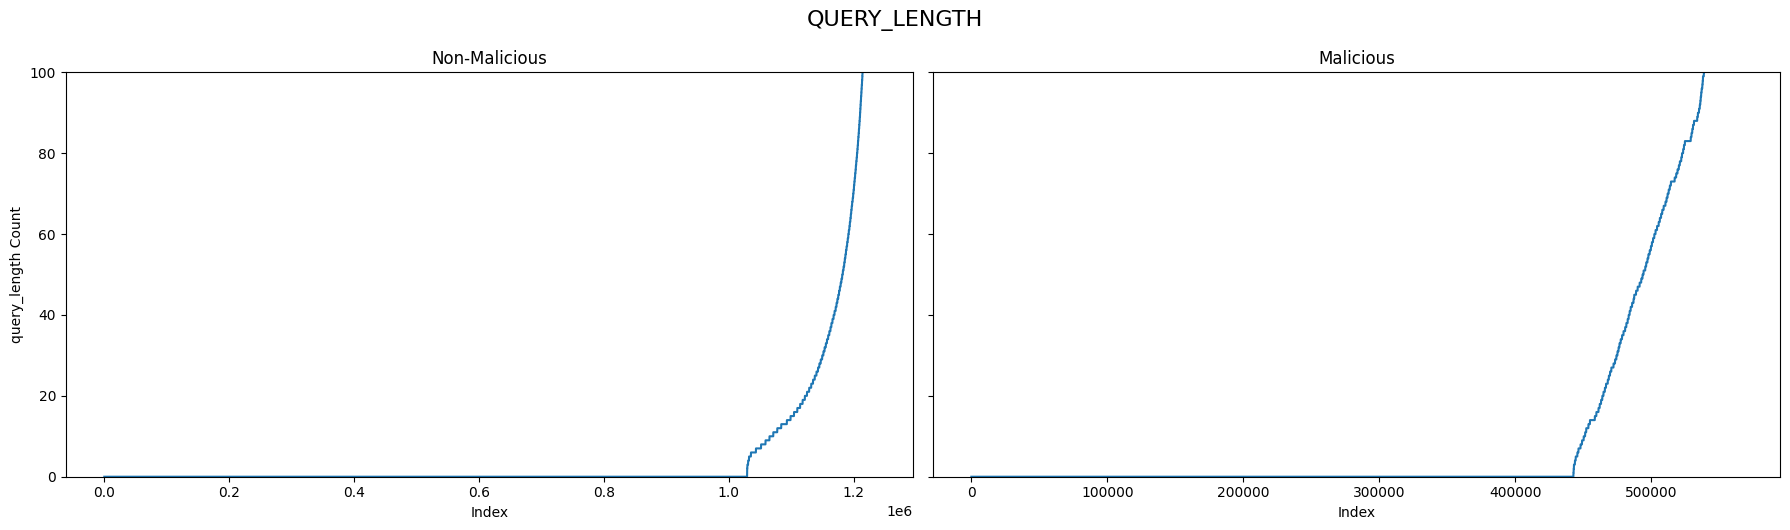

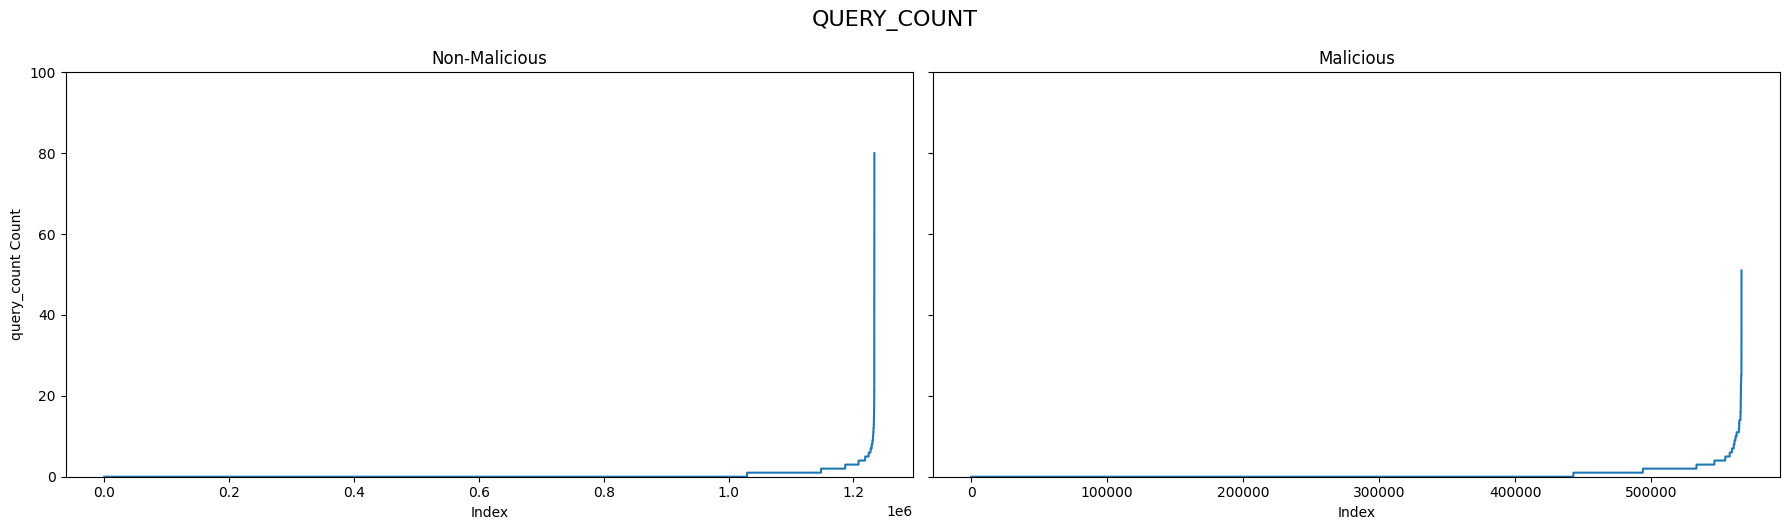

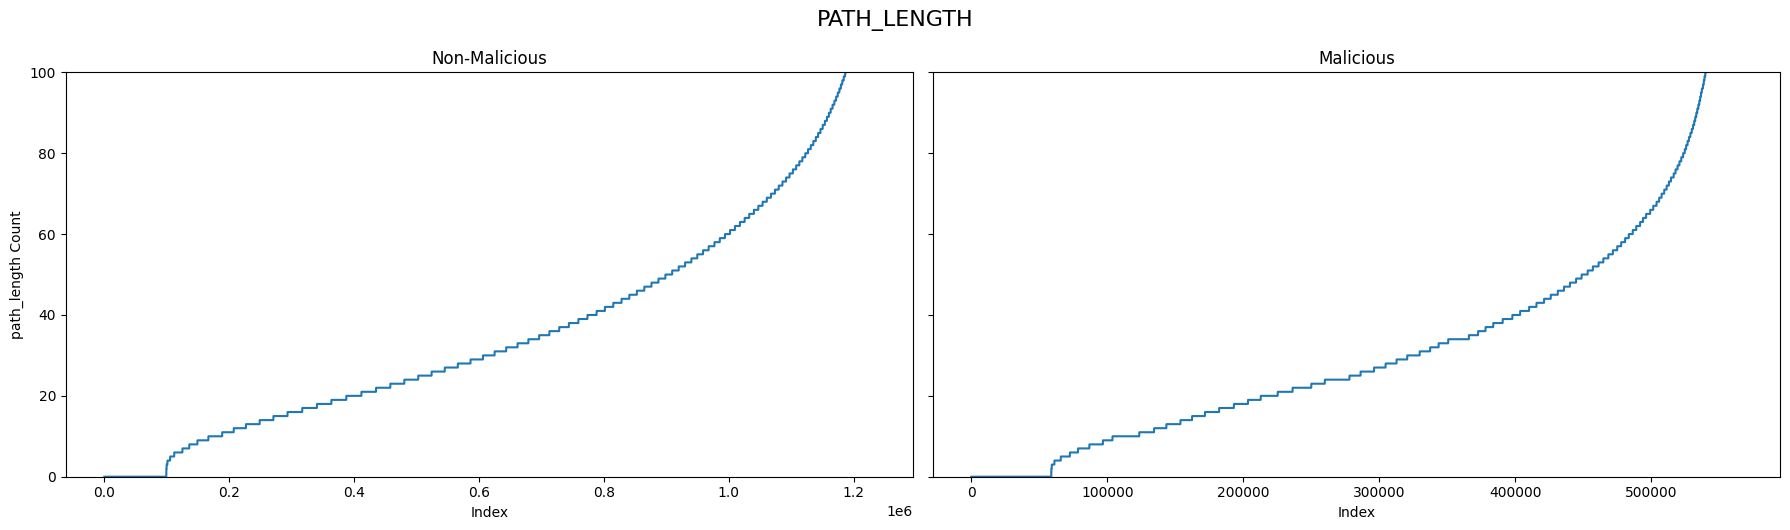

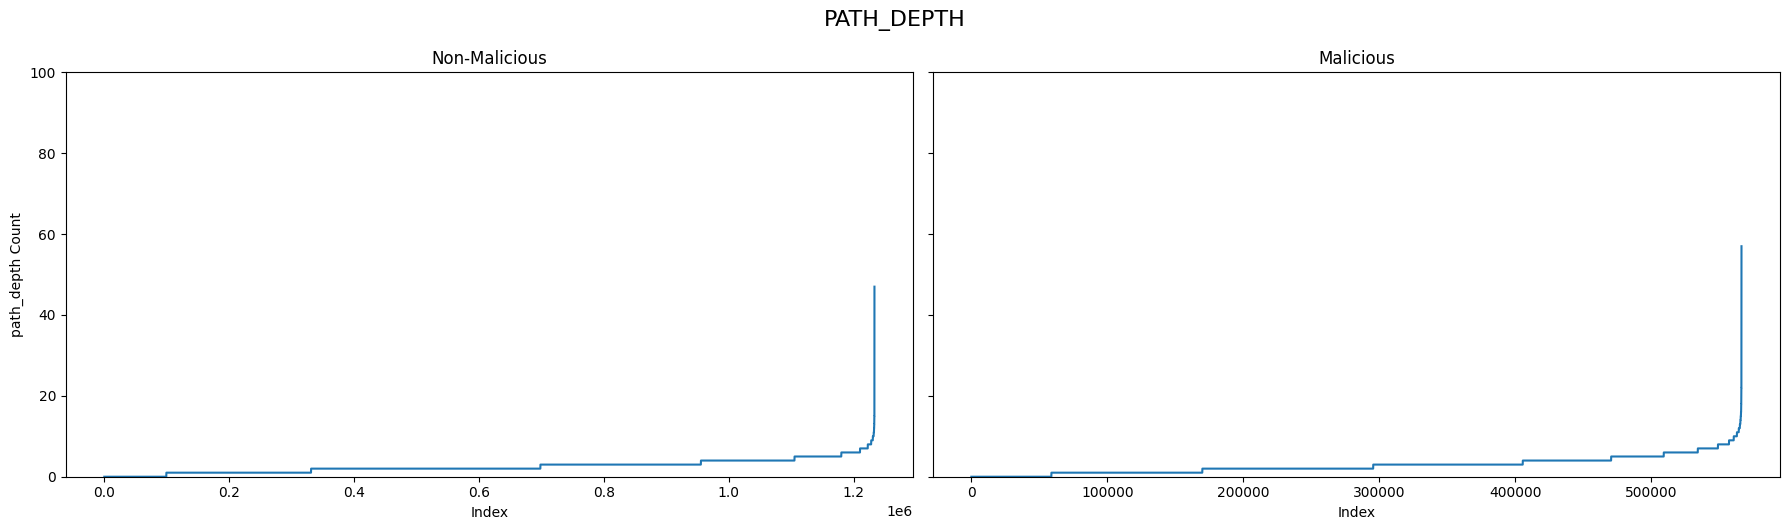

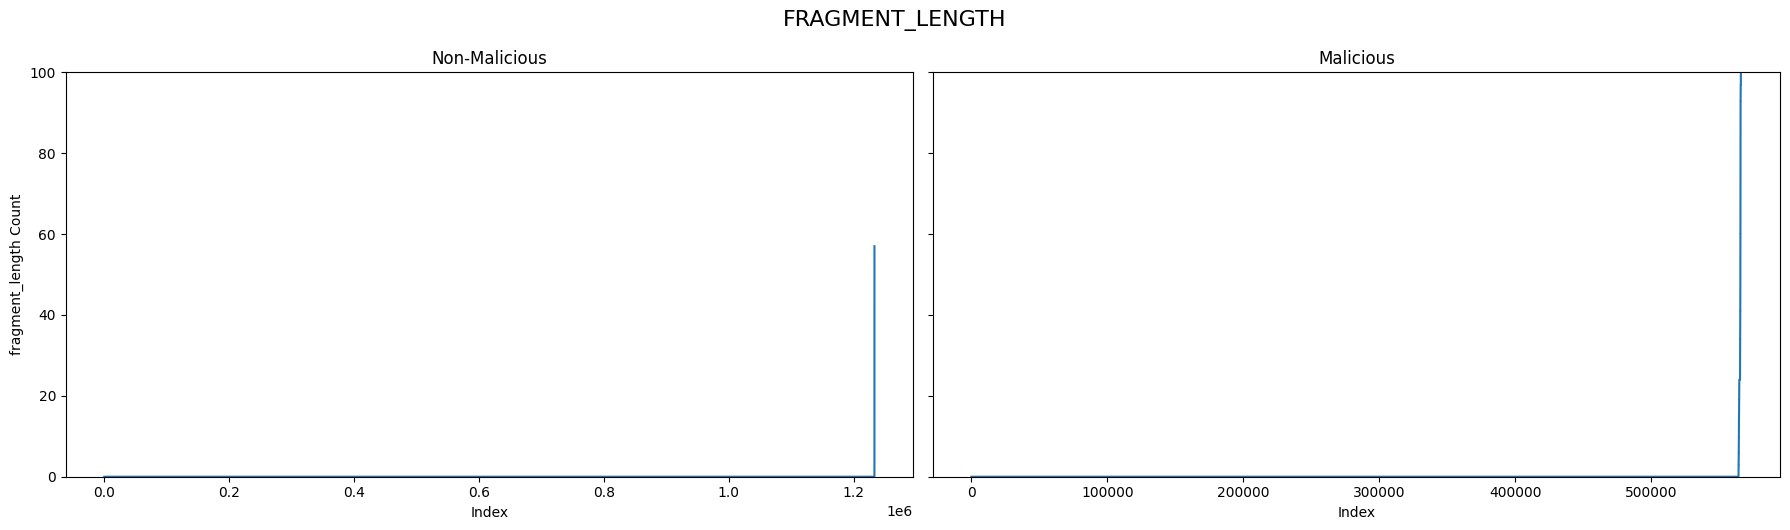

In [13]:
column_list = ["url_length", "domain_length", "query_length", "query_count", "path_length", "path_depth", "fragment_length"]

for i in column_list:
    line_plot(i)

In [15]:
def histogram_plot(column_name):
    fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

    axes[0].hist(cf1[column_name], bins=30, color='blue', alpha=0.7)
    axes[0].set_title("Non-Malicious")
    axes[0].set_xlabel(f"{column_name} Ratio")
    axes[0].set_ylabel("Frequency")
    axes[0].set_xlim(0, 1)

    axes[1].hist(cf2[column_name], bins=30, color='red', alpha=0.7)
    axes[1].set_title("Malicious")
    axes[1].set_xlabel(f"{column_name} Ratio")
    axes[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.suptitle(f"Histogram of {column_name.upper()}", fontsize=16, y=1.05)
    plt.show()


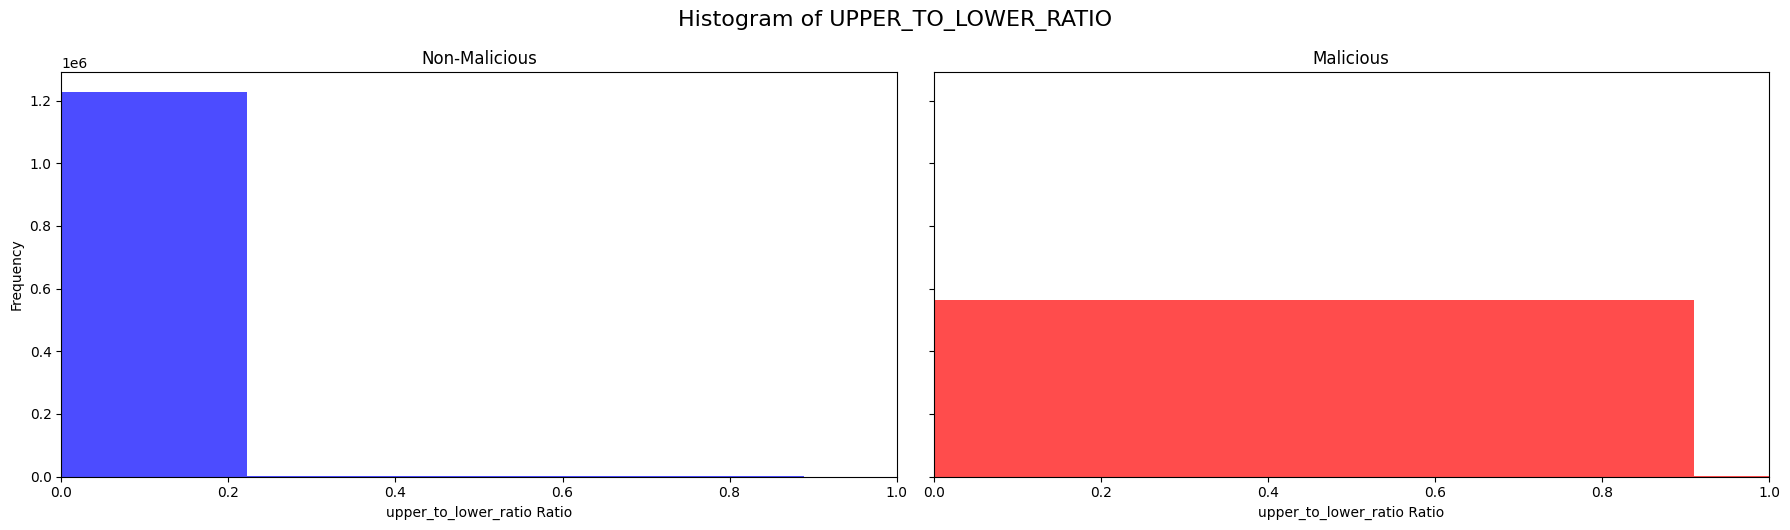

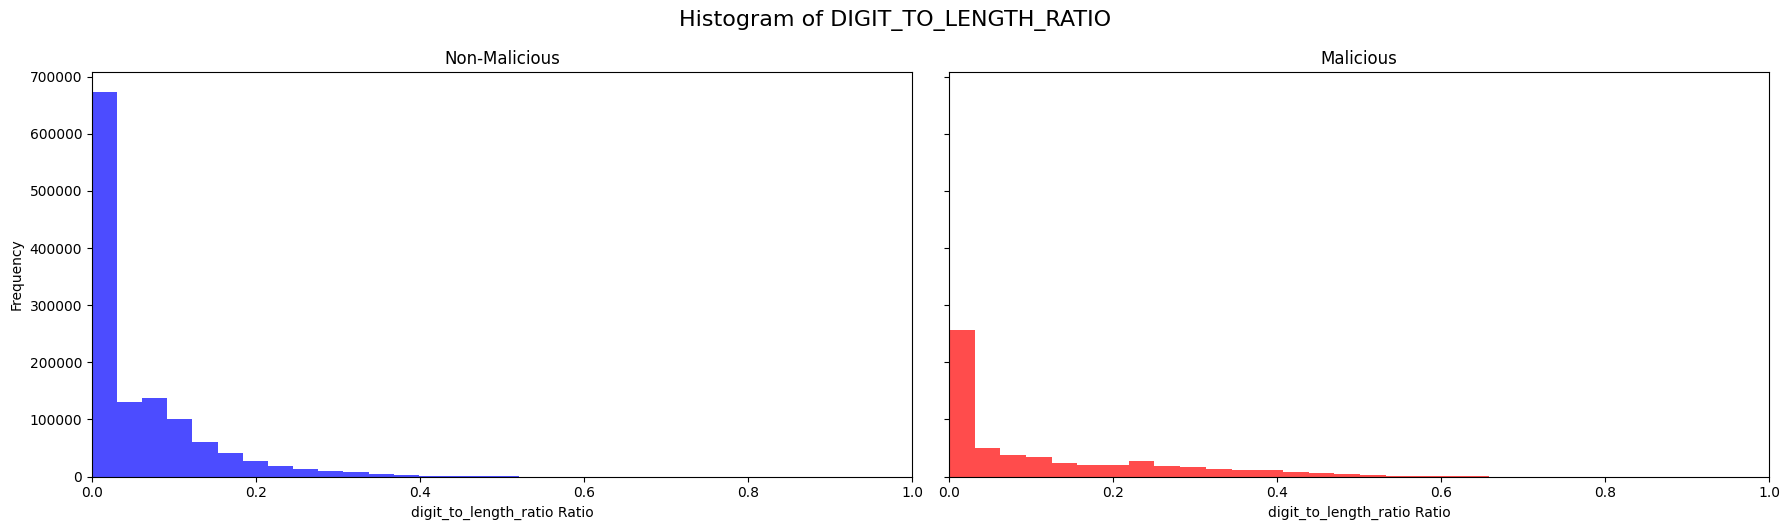

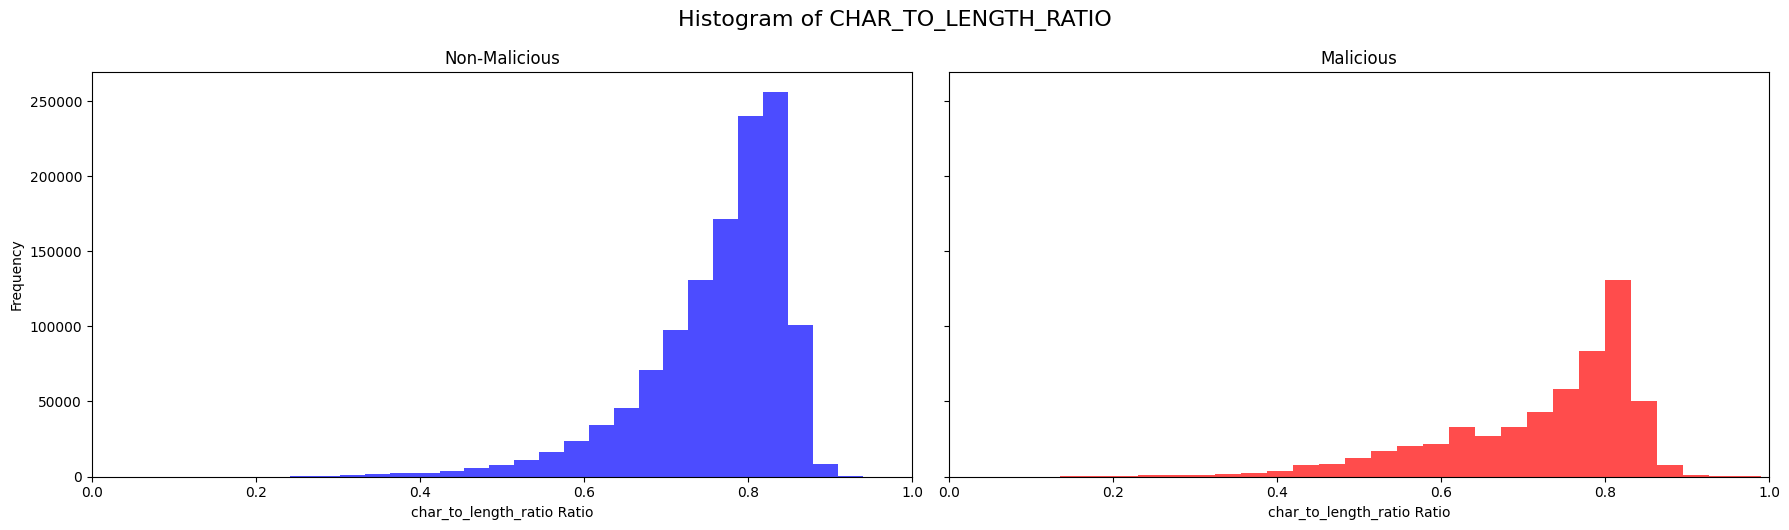

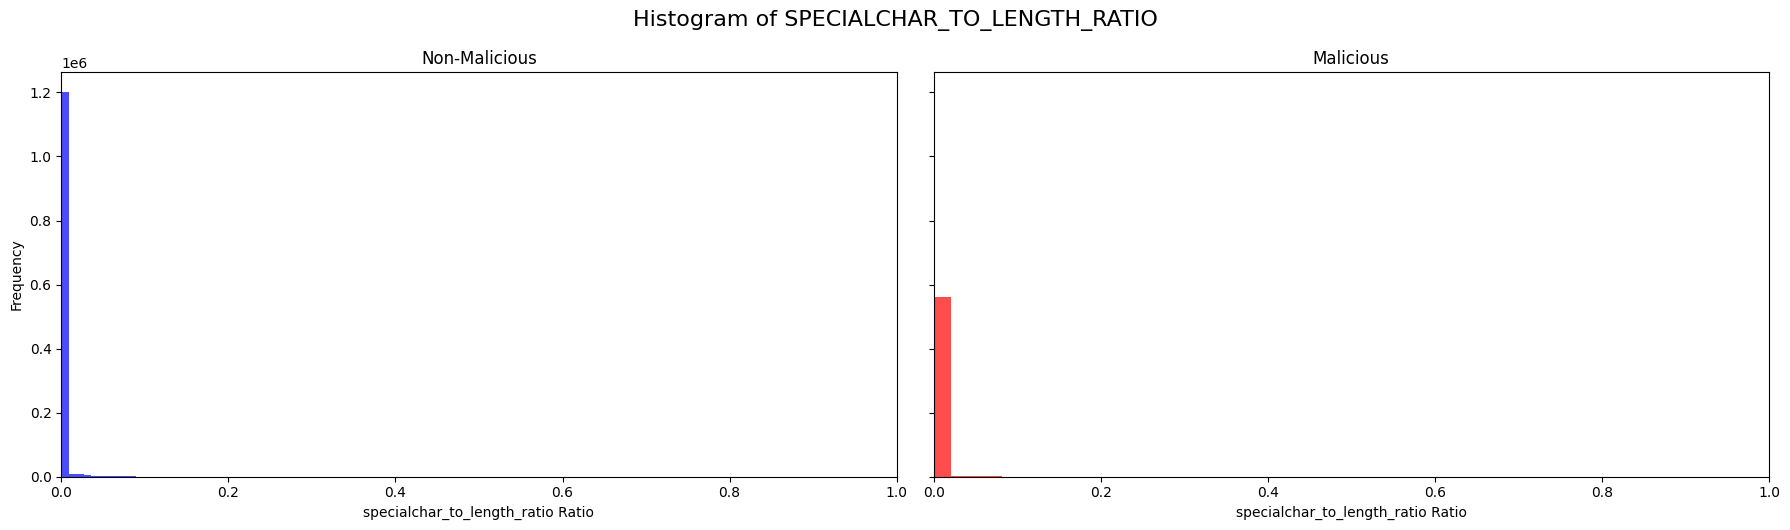

In [17]:
column_list = ["upper_to_lower_ratio", "digit_to_length_ratio", "char_to_length_ratio", "specialchar_to_length_ratio"]

for i in column_list:
    histogram_plot(i)

In [37]:
def pie_plot(column_list):
    for column_name in column_list:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        datasets = [cf1, cf2]
        titles = ["Non-Malicious", "Malicious"]

        for ax, data, title in zip(axes, datasets, titles):
            counts = data[column_name].value_counts().sort_index()

            if set(counts.index) == {0, 1}:  
                labels = ["No", "Yes"]  
                colors = ["lightgreen", "lightcoral"]  
            else:
                labels = [str(val) for val in counts.index]
                colors = None

            wedges, texts, autotexts = ax.pie(
                counts,
                labels=labels,
                autopct='%1.1f%%',
                colors=colors,
                startangle=90
            )

            for i, p in enumerate(wedges):
                ang = (p.theta2 - p.theta1)/2. + p.theta1
                y = np.sin(np.deg2rad(ang))
                x = np.cos(np.deg2rad(ang))
                ax.annotate(
                    f"{counts.iloc[i]}",
                    xy=(x, y),
                    xytext=(1.25*x, 1.25*y),
                    ha='center', va='center',
                    fontsize=10, weight='bold',
                    arrowprops=dict(arrowstyle="-", color="gray", lw=1)
                )

            ax.set_title(f"{title}")

        plt.suptitle(f"{column_name.upper()}", fontsize=16, y=1.05)
        plt.tight_layout()
        plt.show()


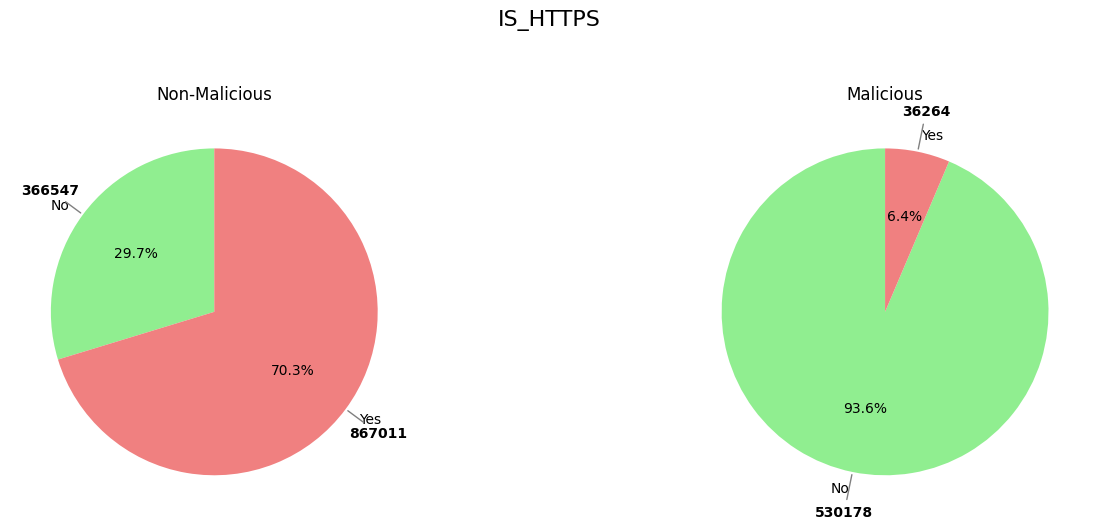

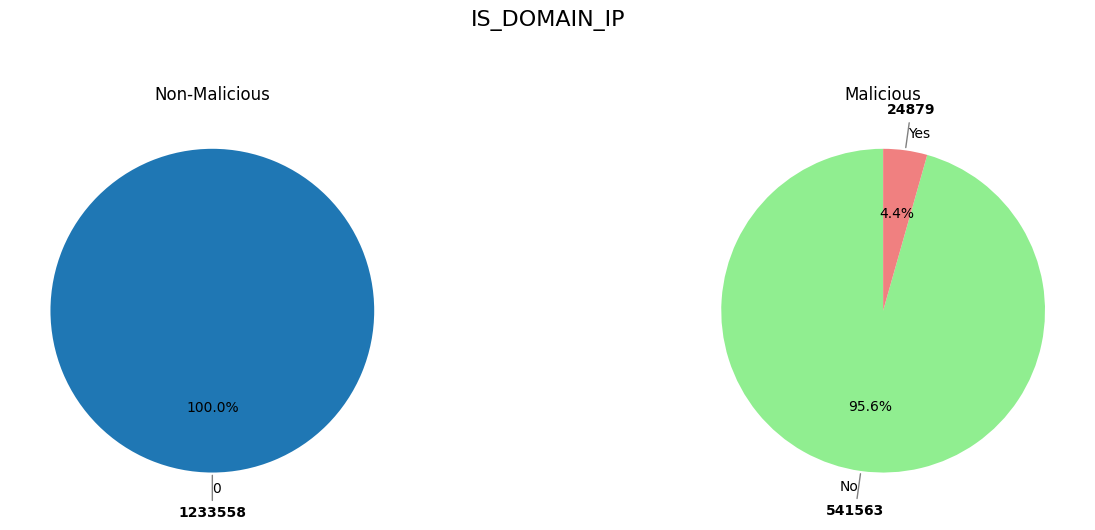

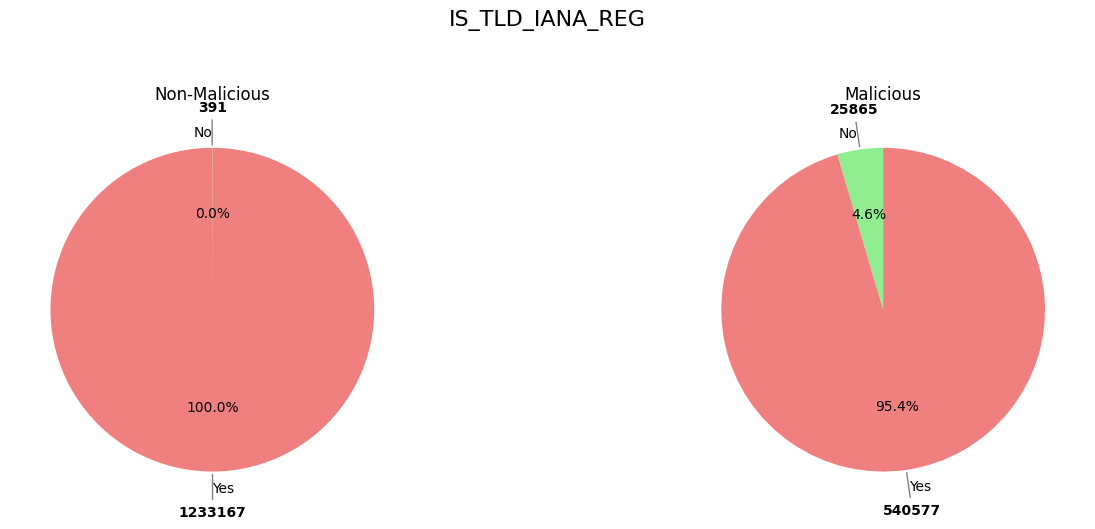

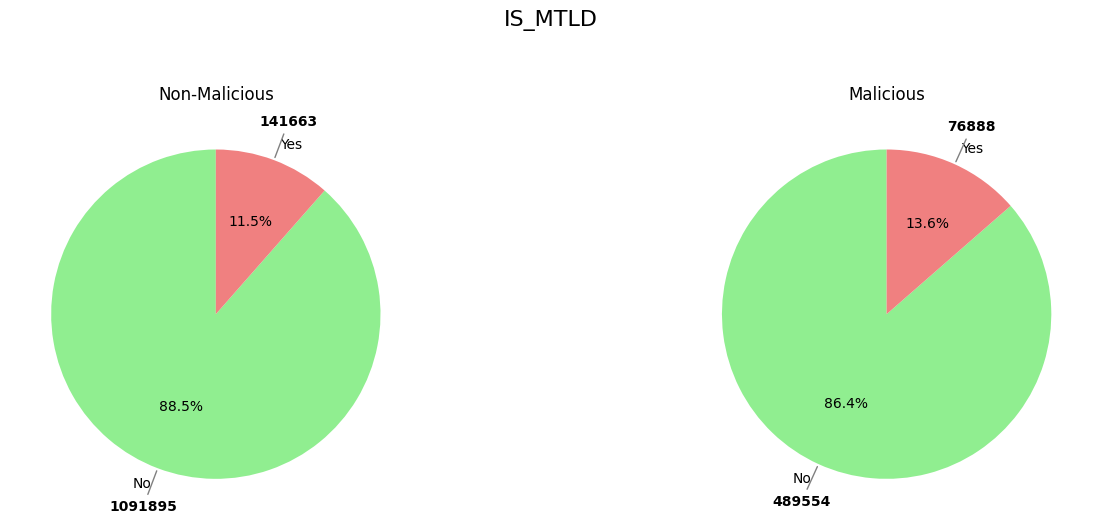

In [40]:
column_list = ["is_https", "is_domain_ip", "is_tld_iana_reg", "is_mtld"]
pie_plot(column_list)

In [46]:
def histogram_plot(columns):
    for col in columns:
        plt.figure(figsize=(12, 5))

        plt.hist(cf1[col], bins=30, alpha=0.6, label="Non-Malicious", color="lightgreen", density=True)
        plt.hist(cf2[col], bins=30, alpha=0.6, label="Malicious", color="lightcoral", density=True)

        plt.title(f"{col.upper()}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.show()

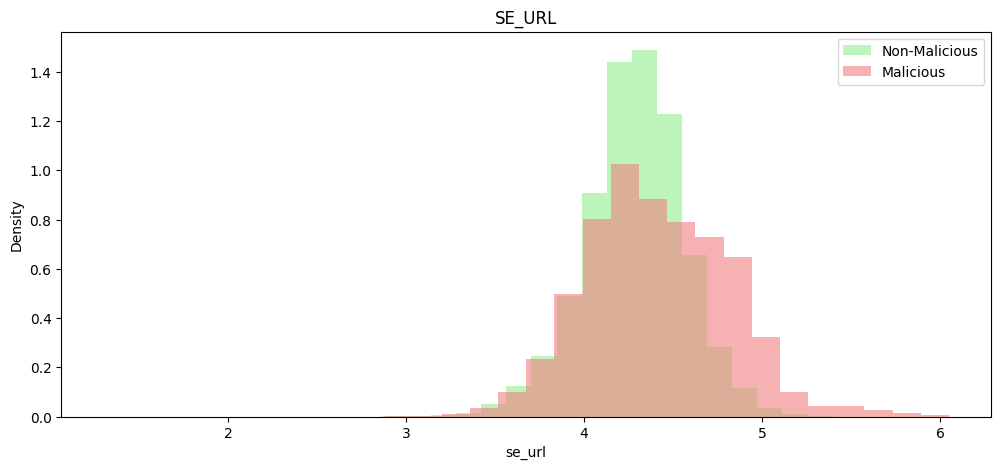

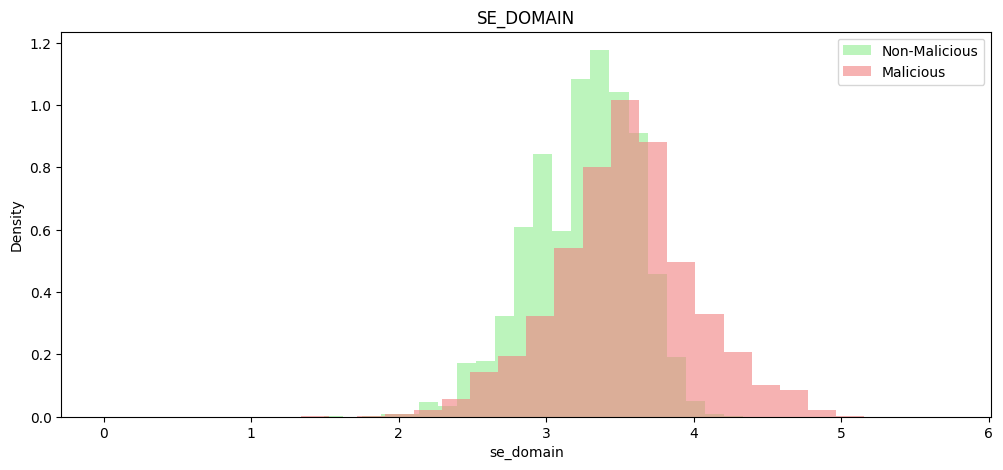

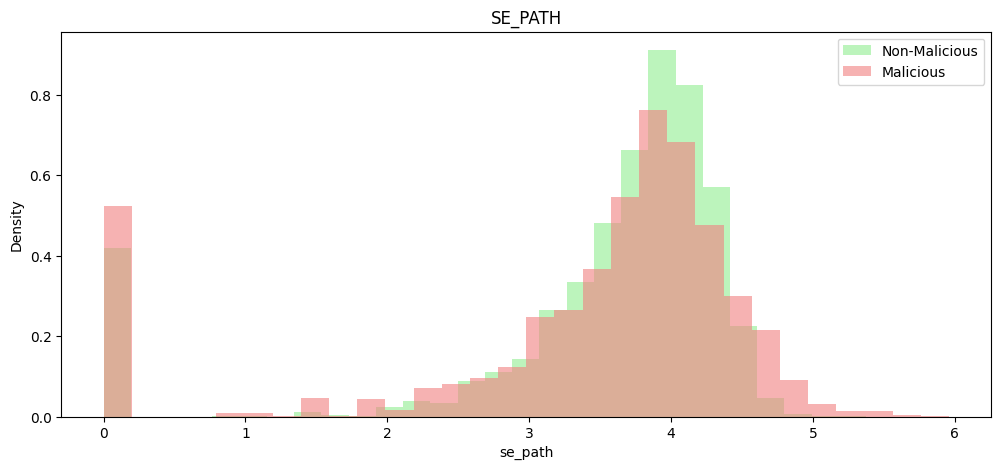

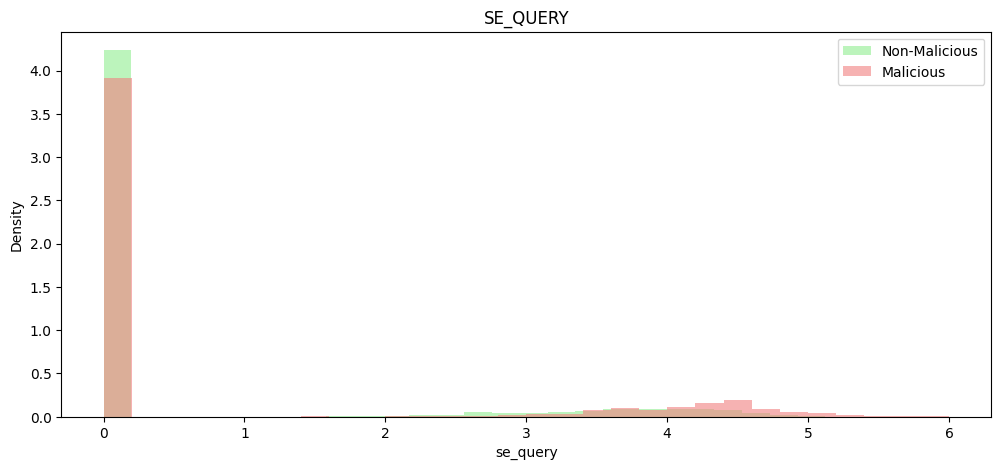

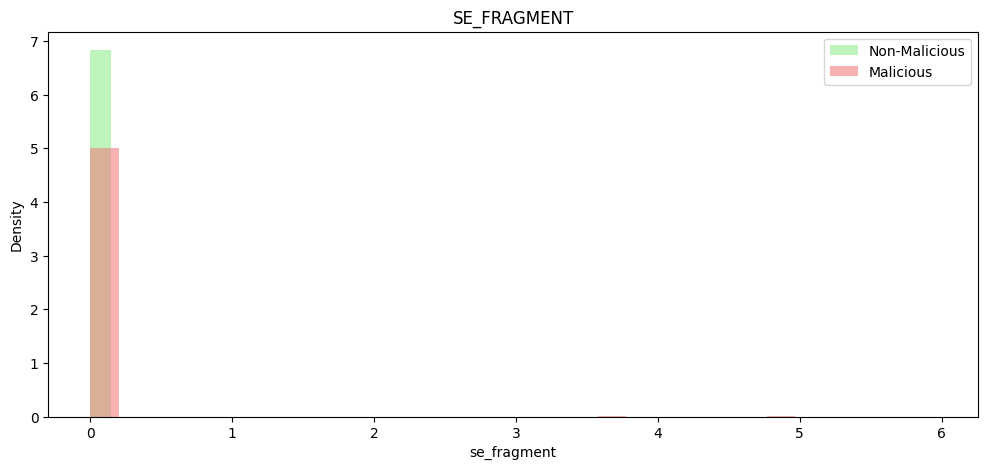

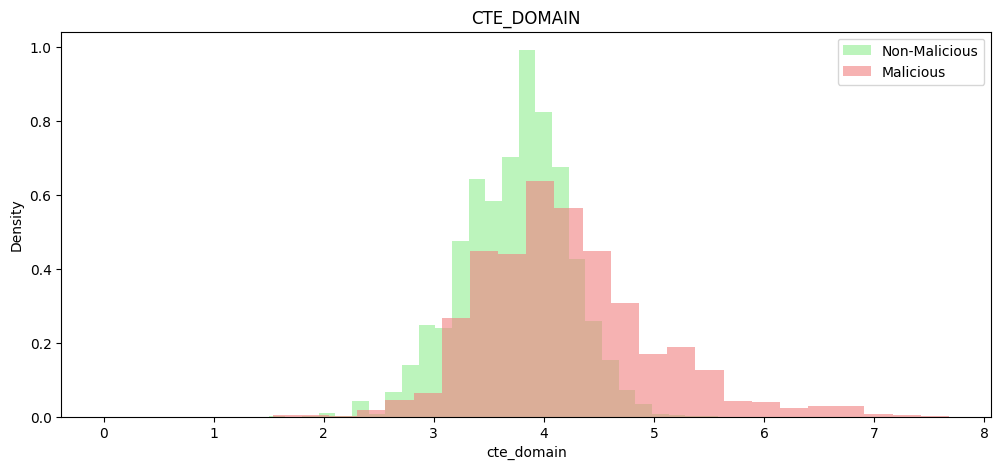

In [47]:
column_list = ['se_url', 'se_domain', 'se_path', 'se_query', 'se_fragment', 'cte_domain']
histogram_plot(column_list)

In [55]:
def box_plot(columns):
    for col in columns:
        plt.figure(figsize=(12, 3))
        plt.boxplot([cf1[col], cf2[col]], tick_labels=["Non-Malicious", "Malicious"])
        plt.title(f"{col.upper()}")
        plt.ylabel(col)
        plt.show()

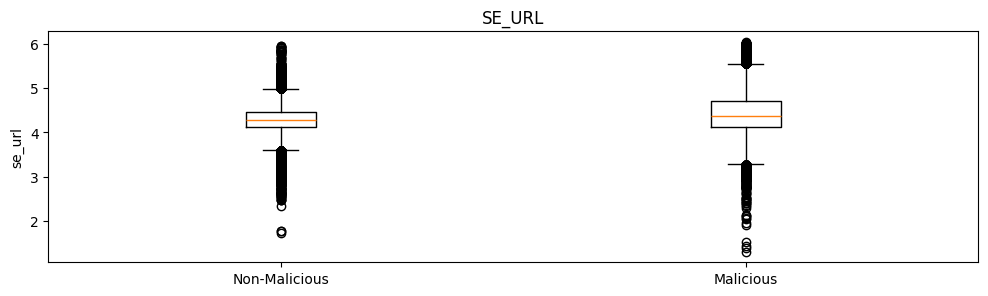

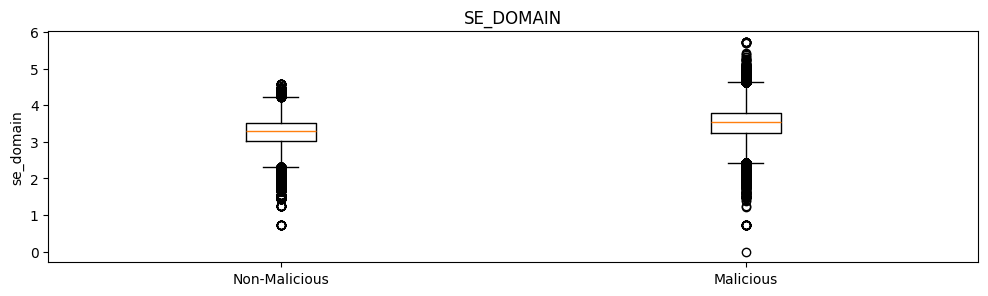

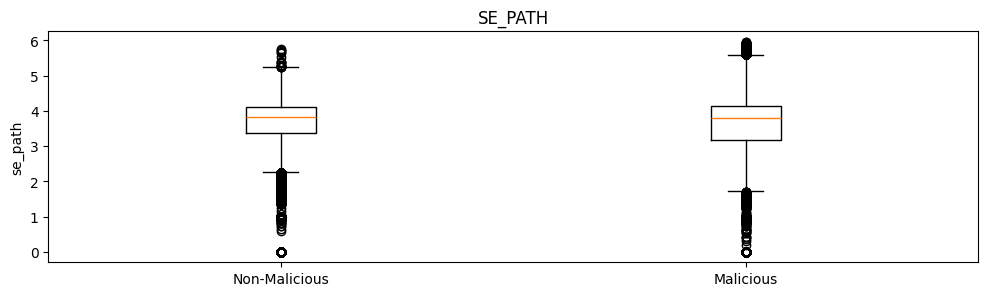

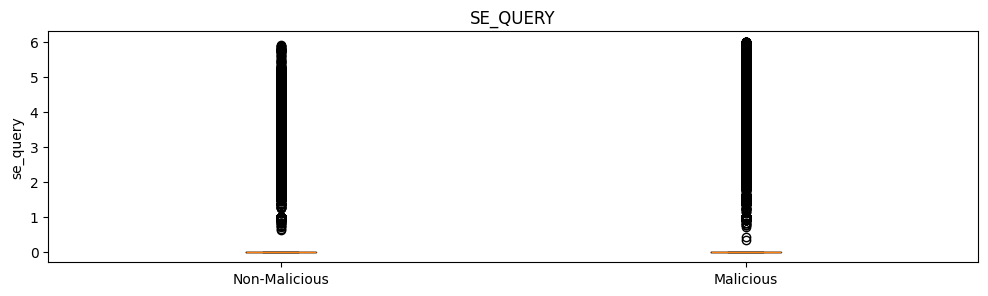

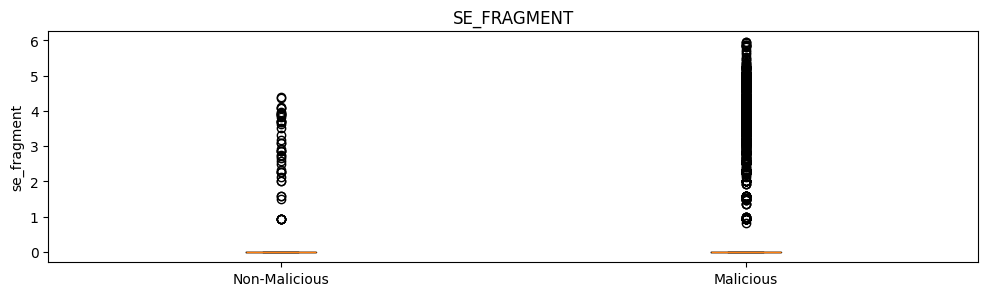

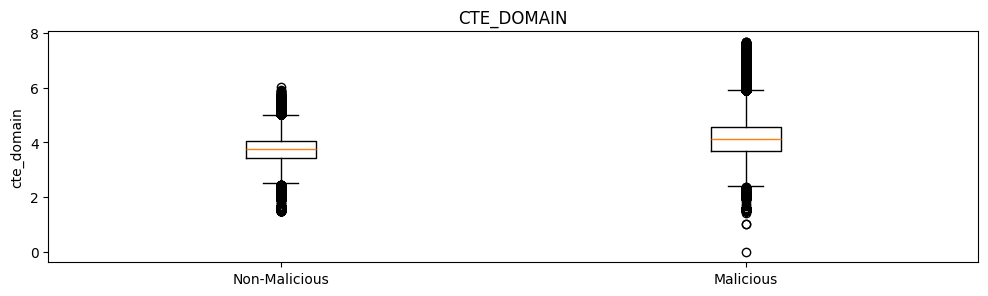

In [56]:
box_plot(column_list)